In [1]:
# Import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

import dataframe_image as dfi

%matplotlib inline

## Import and explore the data

In [2]:
listings = pd.read_csv('/Users/sugandhkumar/Desktop/Udacity Python/Boston/listings.csv')
listings.head(5)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",...,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...",...,9.0,f,NaN,NaN,t,moderate,f,f,1,1.30
2,6976,https://www.airbnb.com/rooms/6976,20160906204935,2016-09-07,Mexican Folk Art Haven in Boston,"Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...",none,The LOCATION: Roslindale is a safe and diverse...,...,10.0,f,NaN,NaN,f,moderate,t,f,1,0.47
3,1436513,https://www.airbnb.com/rooms/1436513,20160906204935,2016-09-07,Spacious Sunny Bedroom Suite in Historic Home,Come experience the comforts of home away from...,Most places you find in Boston are small howev...,Come experience the comforts of home away from...,none,Roslindale is a lovely little neighborhood loc...,...,10.0,f,NaN,NaN,f,moderate,f,f,1,1.00
4,7651065,https://www.airbnb.com/rooms/7651065,20160906204935,2016-09-07,Come Home to Boston,"My comfy, clean and relaxing home is one block...","Clean, attractive, private room, one block fro...","My comfy, clean and relaxing home is one block...",none,"I love the proximity to downtown, the neighbor...",...,10.0,f,NaN,NaN,f,flexible,f,f,1,2.25


In [3]:
calendar = pd.read_csv('/Users/sugandhkumar/Desktop/Udacity Python/Boston/calendar.csv')
calendar.head()

,listing_id,date,available,price
0,12147973,2017-09-05,f,NaN
1,12147973,2017-09-04,f,NaN
2,12147973,2017-09-03,f,NaN
3,12147973,2017-09-02,f,NaN
4,12147973,2017-09-01,f,NaN


In [4]:
calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1308890 entries, 0 to 1308889
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   listing_id  1308890 non-null  int64 
 1   date        1308890 non-null  object
 2   available   1308890 non-null  object
 3   price       643037 non-null   object
dtypes: int64(1), object(3)
memory usage: 39.9+ MB


In [5]:
# This shows that the price is missing when the property is unavailble
print(calendar[calendar["available"] == "f"]["price"].isnull().mean())

1.0


In [6]:
# The price is a string with $ attached, lose the $sign and convert to numeric
calendar["price"] = pd.to_numeric(calendar["price"].str[1:].str.replace(',',''))

# Convert the date to date type numeric format
calendar["date"] = pd.to_datetime(calendar["date"])

In [7]:
# Check if the conditions applied above are working
print(calendar.dtypes, "\n")
print(calendar["date"].min(), "\t" , calendar["date"].max())

# Everythig is working as expected

listing_id             int64
date          datetime64[ns]
available             object
price                float64
dtype: object 

2016-09-06 00:00:00 	 2017-09-05 00:00:00


In [8]:
# Extract months from calendar dates, will help in summarizing the data 

calendar["month"] = calendar["date"].dt.month_name()
calendar.sort_values(by = ["listing_id", "date"], inplace=True)
calendar.head()

,listing_id,date,available,price,month
1207784,3353,2016-09-06,f,NaN,September
1207783,3353,2016-09-07,f,NaN,September
1207782,3353,2016-09-08,f,NaN,September
1207781,3353,2016-09-09,f,NaN,September
1207780,3353,2016-09-10,f,NaN,September


### 1. Calculate avg prices for different months

In [9]:
# Summarize the data - Calculate average monthly price

avg_monthly_price = calendar.groupby(["month"])["price"].mean().round().reset_index()
month_order = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
avg_monthly_price["month"] = pd.Categorical(avg_monthly_price["month"], categories = month_order, ordered = True)
avg_monthly_price.sort_values("month", inplace=True)

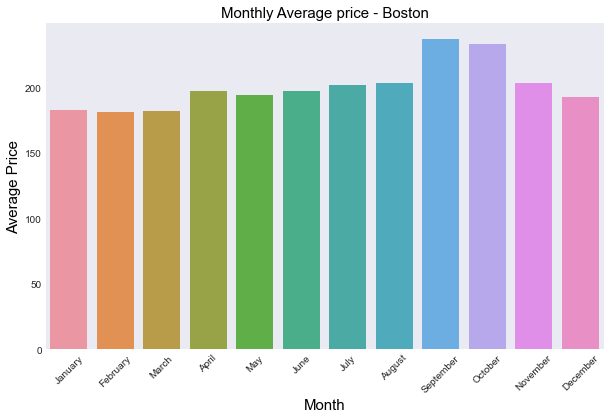

In [47]:
# Plot Boston monthly average data

plt.subplots(figsize=(10, 6));

# style
plt.style.use('seaborn-dark')

sns.barplot(x= "month", y= "price", data=avg_monthly_price, order = month_order);
plt.xticks(rotation = 45);
plt.xlabel("Month", fontsize=15, fontweight=5, color='black');
plt.ylabel("Average Price", fontsize=15, fontweight=5, color='black');
plt.title("Monthly Average price - Boston", loc='center', fontsize=15, fontweight=5, color='black');

plt.savefig('Monthly price trend.png', bbox_inches = "tight")

### 2. Calculate avg prices for different neigbourhoods and across months

In [11]:
# Explore the listings data
listings_x = listings.copy()

# Listings price isn't set to integer, change it
listings_x["price"] = pd.to_numeric(listings_x["price"].str[1:].str.replace(",",""))

# count of neighbourhoods
num_listings = listings_x.neighbourhood_cleansed.value_counts().reset_index()
num_listings.columns = ["index", "num_listings"]
print(num_listings.shape[0], "\n")
num_listings

# There are different prices available, from the calendar data and from the listings data
# To understand monthly trends we need data from calendar dataset (we have expected monthly prices available there, but 
# listings seems to be a better source for static neignbouhood listing prices, so will go with it                                                                 

25 



,index,num_listings
0,Jamaica Plain,343
1,South End,326
2,Back Bay,302
3,Fenway,290
4,Dorchester,269
5,Allston,260
6,Beacon Hill,194
7,Brighton,185
8,South Boston,174
9,Downtown,172


In [12]:
listings_x.price.describe()

count    3585.000000
mean      173.925802
std       148.331321
min        10.000000
25%        85.000000
50%       150.000000
75%       220.000000
max      4000.000000
Name: price, dtype: float64

In [13]:
# Summarise data - Average neighbourhood prices
neighbourhood_price = listings_x.groupby(["neighbourhood_cleansed"])["price"].mean().reset_index().sort_values(by = "price", ascending=False)

neighbourhood_price = pd.merge(neighbourhood_price, num_listings, how="left", left_on="neighbourhood_cleansed", right_on="index")

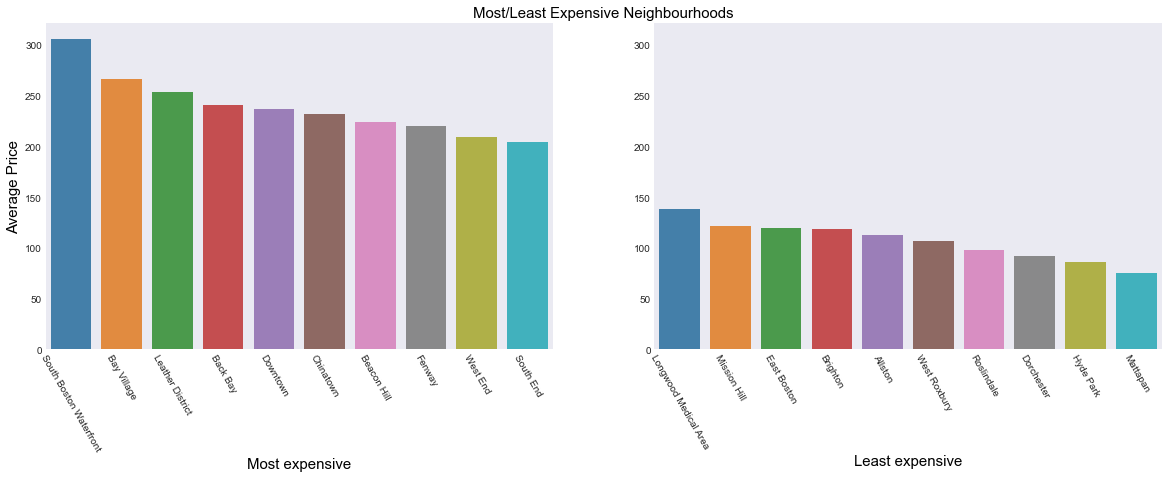

In [14]:
# Plot the most expensive and least expensive neighbourhoods 

f, ax = plt.subplots(sharey = True, figsize=(20, 6));
ax.axis('off') 

# style
plt.style.use('seaborn-dark')

plt.title("Most/Least Expensive Neighbourhoods", loc='center', fontsize=15, fontweight=5, color='black')

f.add_subplot(1,2,1, sharey = ax)
sns.barplot(x="neighbourhood_cleansed", y="price", data = neighbourhood_price[:10], alpha = 0.9);
plt.xticks(rotation = 300);
plt.xlabel("Most expensive", fontsize=15, fontweight=5, color='black');
plt.ylabel("Average Price",  fontsize=15, fontweight=5, color='black');
# sns.scatterplot(data=neighbourhood_price[:7], x="neighbourhood_cleansed", y= "num_listings", color='black')

f.add_subplot(1,2,2, sharey = ax);
sns.barplot(x="neighbourhood_cleansed", y="price", data = neighbourhood_price[-10:], alpha = 0.9);
plt.xticks(rotation = 300);
plt.xlabel("Least expensive", fontsize=15, fontweight=5, color='black');
plt.ylabel("");
# sns.scatterplot(data=neighbourhood_price[-7:], x="neighbourhood_cleansed", y= "num_listings", color='black')

plt.savefig('neighborhood price trend.png', bbox_inches = "tight")

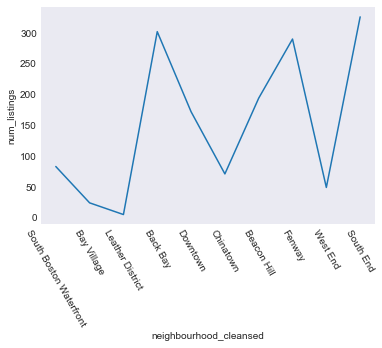

In [15]:
sns.lineplot(data=neighbourhood_price[:10], x="neighbourhood_cleansed", y = "num_listings");
plt.xticks(rotation = 300);

In [16]:
# Summarize the calendar data - Calulate average monthly price for each listing for
cal_list_monthly = calendar.groupby(["listing_id", "month"])["price"].mean().round().reset_index().rename(columns={"price":"avg_m_price"})
cal_list_monthly

,listing_id,month,avg_m_price
0,3353,April,36.0
1,3353,August,36.0
2,3353,December,32.0
3,3353,February,34.0
4,3353,January,33.0
...,...,...,...
43015,14933461,March,NaN
43016,14933461,May,165.0
43017,14933461,November,NaN
43018,14933461,October,165.0


In [17]:
# Merge the listings data with the calendar data - useful to see the monthly variation in prices
listings_monthly = pd.merge(listings, cal_list_monthly, how="left", left_on="id", right_on="listing_id")
listings_monthly.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,listing_id,month,avg_m_price
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",...,NaN,f,moderate,f,f,1,NaN,12147973,April,NaN
1,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",...,NaN,f,moderate,f,f,1,NaN,12147973,August,NaN
2,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",...,NaN,f,moderate,f,f,1,NaN,12147973,December,NaN
3,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",...,NaN,f,moderate,f,f,1,NaN,12147973,February,NaN
4,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",...,NaN,f,moderate,f,f,1,NaN,12147973,January,NaN


In [18]:
# checks on shape 
print(listings.shape)
print(cal_list_monthly.shape)
print(listings_monthly.shape)

(3585, 95)
(43020, 3)
(43020, 98)


In [19]:
# Summarize data by neighbourhood and price
nhood_month_price = listings_monthly.groupby(["neighbourhood_cleansed", "month"])["avg_m_price"].mean().reset_index()
nhood_month_price.sort_values(["neighbourhood_cleansed", "month"], inplace=True)

In [20]:
# Unstack the data, would be used for plotting later on
nhood_month_price_1 = nhood_month_price.pivot_table(index=["month"], columns = ["neighbourhood_cleansed"], values="avg_m_price").round().reset_index().rename_axis(None, axis=1)
nhood_month_price_1.head()

,month,Allston,Back Bay,Bay Village,Beacon Hill,Brighton,Charlestown,Chinatown,Dorchester,Downtown,...,Mattapan,Mission Hill,North End,Roslindale,Roxbury,South Boston,South Boston Waterfront,South End,West End,West Roxbury
0,April,130.0,308.0,312.0,286.0,138.0,210.0,299.0,90.0,296.0,...,78.0,130.0,239.0,97.0,172.0,231.0,291.0,247.0,296.0,115.0
1,August,116.0,300.0,302.0,301.0,137.0,213.0,279.0,94.0,299.0,...,81.0,126.0,274.0,92.0,211.0,250.0,283.0,247.0,283.0,123.0
2,December,136.0,247.0,322.0,230.0,131.0,198.0,279.0,86.0,251.0,...,77.0,146.0,196.0,97.0,137.0,180.0,302.0,217.0,308.0,113.0
3,February,133.0,247.0,306.0,230.0,139.0,190.0,265.0,85.0,235.0,...,76.0,141.0,189.0,92.0,143.0,190.0,285.0,218.0,262.0,113.0
4,January,135.0,250.0,306.0,224.0,133.0,194.0,275.0,86.0,236.0,...,80.0,145.0,194.0,91.0,141.0,190.0,296.0,218.0,263.0,115.0


In [21]:
# Create a list of 4 most expensive and 4 least expensive neighborhoods

# Most expensive
nhood_list = neighbourhood_price[:4]["neighbourhood_cleansed"].to_list()
# Least expensive
nhood_list.extend(neighbourhood_price[-4:]["neighbourhood_cleansed"].to_list())

nhood_list.extend(["Allston", "month"])
print(nhood_list)

#create the df of interest
nhood_df = nhood_month_price_1[nhood_list]
print("\n", nhood_df.shape)
nhood_df.head()

['South Boston Waterfront', 'Bay Village', 'Leather District', 'Back Bay', 'Roslindale', 'Dorchester', 'Hyde Park', 'Mattapan', 'Allston', 'month']

 (12, 10)


,South Boston Waterfront,Bay Village,Leather District,Back Bay,Roslindale,Dorchester,Hyde Park,Mattapan,Allston,month
0,291.0,312.0,339.0,308.0,97.0,90.0,77.0,78.0,130.0,April
1,283.0,302.0,336.0,300.0,92.0,94.0,69.0,81.0,116.0,August
2,302.0,322.0,341.0,247.0,97.0,86.0,74.0,77.0,136.0,December
3,285.0,306.0,338.0,247.0,92.0,85.0,78.0,76.0,133.0,February
4,296.0,306.0,336.0,250.0,91.0,86.0,85.0,80.0,135.0,January


In [22]:
# Merge with the monthly price dataset to get the boston average
nhood_df_1 = pd.merge(nhood_df, avg_monthly_price, how="left", on="month").rename(columns={"price": "Boston_Avg"}).set_index("month").loc[month_order].reset_index()
nhood_df_1

,month,South Boston Waterfront,Bay Village,Leather District,Back Bay,Roslindale,Dorchester,Hyde Park,Mattapan,Allston,Boston_Avg
0,January,296.0,306.0,336.0,250.0,91.0,86.0,85.0,80.0,135.0,183.0
1,February,285.0,306.0,338.0,247.0,92.0,85.0,78.0,76.0,133.0,181.0
2,March,292.0,308.0,338.0,266.0,92.0,86.0,68.0,80.0,130.0,182.0
3,April,291.0,312.0,339.0,308.0,97.0,90.0,77.0,78.0,130.0,197.0
4,May,290.0,316.0,336.0,298.0,92.0,90.0,65.0,81.0,116.0,194.0
5,June,286.0,315.0,339.0,292.0,93.0,94.0,71.0,81.0,117.0,197.0
6,July,285.0,315.0,338.0,305.0,93.0,95.0,70.0,81.0,119.0,202.0
7,August,283.0,302.0,336.0,300.0,92.0,94.0,69.0,81.0,116.0,203.0
8,September,351.0,302.0,374.0,297.0,96.0,94.0,79.0,76.0,131.0,237.0
9,October,383.0,316.0,391.0,309.0,103.0,89.0,80.0,74.0,143.0,233.0


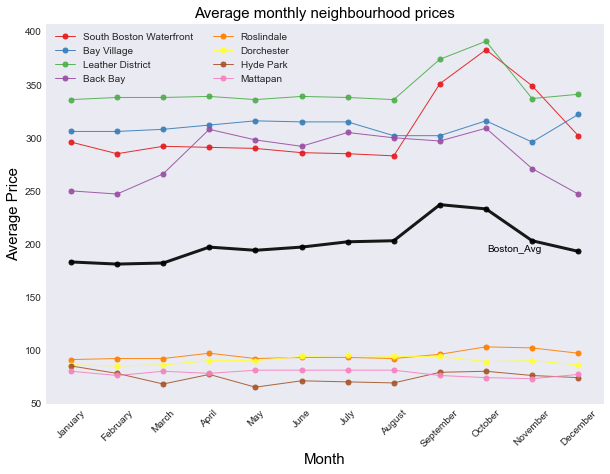

In [23]:
# Plot the figure

plt.figure(figsize=(10, 7))

# style
plt.style.use('seaborn-dark')
 
# create a color palette
palette = plt.get_cmap('Set1')


num=-1
for column in nhood_df_1.drop(['month', "Allston", "Boston_Avg"] , axis=1):
    num+=1
    plt.plot(nhood_df_1['month'], nhood_df_1[column], marker='o', color=palette(num), linewidth=1, alpha=0.9, markersize=5, label=column);
    
plt.xticks(rotation=45);

plt.plot(nhood_df_1['month'], nhood_df_1["Boston_Avg"], marker='o', color='black', linewidth=3, alpha=0.9, markersize=5);
# And add a special annotation for the group we are interested in
plt.text(10.2, nhood_df_1.Boston_Avg.tail(1), 'Boston_Avg', horizontalalignment='right', size='medium', color='black');

# # plot for allston - base categoty in the model
# plt.plot(nhood_df_1['month'], nhood_df_1["Allston"], marker='o', color='blue', linewidth=2, alpha=0.9, markersize=5);
# # And add a special annotation for the group we are interested in
# plt.text(10.2, nhood_df_1.Allston.tail(1), 'Allston', horizontalalignment='right', size='medium', color='black');

# Add legend
plt.legend(loc=2, ncol=2)
 
# Add titles
plt.title("Average monthly neighbourhood prices", loc='center', fontsize=15, fontweight=5, color='black');
plt.xlabel("Month", fontsize=15, fontweight=5, color='black');
plt.ylabel("Average Price", fontsize=15, fontweight=5, color='black');

plt.savefig('Neigh month trend.png', bbox_inches = "tight")

## Data preparation for Linear Regression

1. Clear out the noise from the listings data

In [24]:
#1. drop all columns with less than 75% of data available
drop_cols_75 = list(listings.columns[listings.isnull().mean() > 0.75])
print("Drop Columns with > 75% missing values in listings - ")
print(drop_cols_75)

listings_1 = listings.drop(drop_cols_75, axis=1)

Drop Columns with > 75% missing values in listings - 
['neighbourhood_group_cleansed', 'square_feet', 'weekly_price', 'monthly_price', 'has_availability', 'license', 'jurisdiction_names']


In [25]:
#2. Dropping all the URLs for now
# URLs can be used to create flags of whether the host/property has pictures etc. and can potentially be used as a 
# feature in a predictive model

drop_url_cols = list(listings_1.filter(regex='url').columns)
print("URL columns to be dropped -  \n", drop_url_cols)
listings_2 = listings_1.drop(drop_url_cols, axis=1)

URL columns to be dropped -  
 ['listing_url', 'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url', 'host_url', 'host_thumbnail_url', 'host_picture_url']


2. Clean the date and numeric formats

In [26]:
# Define funtions to use

def date_format(df, col_list):
    """
    Function to change a column to date format
    """
    
    for col in col_list:
        df[col] = pd.to_datetime(df[col])
    return df

def price_to_int(df, col_list):
    """
    Funtion to change price from object format to int
    """
    for col in col_list:
        df[col] = pd.to_numeric(df[col].str[1:].str.replace(",",""))
    return df

def percent_to_int(df, col_list):
    """
    Funtion to change rates from object to int (100% to 100)
    """
    for col in col_list:
        df[col] = pd.to_numeric(df[col].str[:-1])
    return df        

In [27]:
# List of column where formats has to be changed

dates_col_list = ['last_scraped', 'host_since', 'calendar_last_scraped', 'first_review', 'last_review']

price_col_list = ['price', 'security_deposit', 'cleaning_fee', 'extra_people']

percent_list = list(listings_1.filter(regex='rate').columns)

# Columns of interest
print('dates_col_list: {}\nprice_col_list: {}\npercent_list: {}\n'.format(dates_col_list,price_col_list,percent_list))

#Change format
percent_to_int(listings_2,percent_list)
price_to_int(listings_2, price_col_list)
date_format(listings_2,dates_col_list)

# Checks
print(listings_2[percent_list].dtypes, "\n")
print(listings_2[price_col_list].dtypes, "\n")
print(listings_2[dates_col_list].dtypes, "\n")

dates_col_list: ['last_scraped', 'host_since', 'calendar_last_scraped', 'first_review', 'last_review']
price_col_list: ['price', 'security_deposit', 'cleaning_fee', 'extra_people']
percent_list: ['host_response_rate', 'host_acceptance_rate']

host_response_rate      float64
host_acceptance_rate    float64
dtype: object 

price               float64
security_deposit    float64
cleaning_fee        float64
extra_people        float64
dtype: object 

last_scraped             datetime64[ns]
host_since               datetime64[ns]
calendar_last_scraped    datetime64[ns]
first_review             datetime64[ns]
last_review              datetime64[ns]
dtype: object 



In [28]:
# Define a function for number of months calculation

def months_since(df, new_col_name, start_date_col, end_date_col = "last_scraped", drop_col = True):
    """
    Function to calculate # of months since the start date upto the end date
    
    Inputs:
    1. df - Dataframe
    2. new_col_name - name of the new column to be created
    3. start_date_col - start date for calculation
    4. end_date_col - end date for calculation (default = last_scraped)
    5. drop_col - whether to retain the start date column (default = True)
    """
    x = df[end_date_col].dt.month - df[start_date_col].dt.month
    y = df[end_date_col].dt.year - df[start_date_col].dt.year
    
    df[new_col_name] =  x + 12*y
    
    if drop_col:
        df.drop(start_date_col, axis=1, inplace=True)
    
    return df

3. Add features based on host experience

In [29]:
# Use the num months calculation function

months_since(listings_2, "num_mnths_host", "host_since")
months_since(listings_2, "num_mnths_f_review", "first_review")
months_since(listings_2, "num_mnths_l_review", "last_review")

listings_2.head()

,id,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,...,requires_license,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,num_mnths_host,num_mnths_f_review,num_mnths_l_review
0,12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",NaN,...,f,f,moderate,f,f,1,NaN,17,NaN,NaN
1,3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...","If you don't have a US cell phone, you can tex...",...,f,t,moderate,f,f,1,1.30,51,27.0,1.0
2,6976,20160906204935,2016-09-07,Mexican Folk Art Haven in Boston,"Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...",none,The LOCATION: Roslindale is a safe and diverse...,I am in a scenic part of Boston with a couple ...,...,f,f,moderate,t,f,1,0.47,88,86.0,1.0
3,1436513,20160906204935,2016-09-07,Spacious Sunny Bedroom Suite in Historic Home,Come experience the comforts of home away from...,Most places you find in Boston are small howev...,Come experience the comforts of home away from...,none,Roslindale is a lovely little neighborhood loc...,Please be mindful of the property as it is old...,...,f,f,moderate,f,f,1,1.00,41,1.0,1.0
4,7651065,20160906204935,2016-09-07,Come Home to Boston,"My comfy, clean and relaxing home is one block...","Clean, attractive, private room, one block fro...","My comfy, clean and relaxing home is one block...",none,"I love the proximity to downtown, the neighbor...",I have one roommate who lives on the lower lev...,...,f,f,flexible,f,f,1,2.25,28,13.0,0.0


4. Drop columns that have the same value

In [30]:
# Drop columns if all the values in the column are the same

def is_unique(df):
    """
    Function to ascertain if all the values of a dataframe column has the same value
    """
    a = df.to_numpy() # s.values (pandas<0.24)
    return (a[0] == a).all(0)


col_value_same_check = listings_2.apply(is_unique).reset_index().rename(columns = {"index":"col_name", 0:"is_same"})

same_val_list = col_value_same_check[col_value_same_check["is_same"] == True]["col_name"].to_list()
print(same_val_list)

listings_3 = listings_2.drop(same_val_list, axis=1)
listings_3.shape

['scrape_id', 'last_scraped', 'experiences_offered', 'state', 'country_code', 'country', 'calendar_last_scraped', 'requires_license']


(3585, 72)

5. Parse different amenities from the amenities column

In [31]:
# Create a list of all amenities offered by all the listings

amenities_comp_list = listings_3[["id", "amenities"]]["amenities"].str[1:-1].str.replace('"',"").str.split(",").to_list()
amenties_union_list = list(set().union(*amenities_comp_list))

#list of amenities that won't be considered
remove_list = ['Cat(s)','Dog(s)','Pets live on this property', 'translation missing: en.hosting_amenity_50', 
               'translation missing: en.hosting_amenity_49', 'Other pet(s)', 'Family/Kid Friendly', '', 
               'Wireless Internet','Washer / Dryer', 'Lock on Bedroom Door', 'Shampoo',  'Paid Parking Off Premises',
               'Carbon Monoxide Detector']

# Final list with only the elements to be considered
amenties_final_list = [i for i in amenties_union_list if i not in remove_list]
print(amenties_final_list)

['Dryer', '24-Hour Check-in', 'Buzzer/Wireless Intercom', 'Heating', 'Free Parking on Premises', 'Safety Card', 'First Aid Kit', 'Smoke Detector', 'Essentials', 'Smoking Allowed', 'Wheelchair Accessible', 'Free Parking on Street', 'Fire Extinguisher', 'Hangers', 'Hair Dryer', 'Hot Tub', 'Iron', 'Gym', 'Washer', 'Indoor Fireplace', 'Laptop Friendly Workspace', 'Breakfast', 'Elevator in Building', 'Doorman', 'Pets Allowed', 'Pool', 'Suitable for Events', 'Kitchen', 'Cable TV', 'TV', 'Internet', 'Air Conditioning']


In [32]:
# Copy of the data to work with
amenities_clean = listings_3[["id", "amenities"]]

# The column looks like a dictionary/list but its actually an object
amenities_clean["amenities_clean"] = amenities_clean["amenities"].str.replace('"',"")
amenities_clean["amenities_clean"] = amenities_clean["amenities_clean"].str.replace('{', '["')
amenities_clean["amenities_clean"] = amenities_clean["amenities_clean"].str.replace('}', '"]')
amenities_clean["amenities_clean"] = amenities_clean["amenities_clean"].str.replace(',','","')

# Replace some amenities that may be double-counted.
# Internet and wireless internet - assume same for simplicity
# Washer/Dryer - separate them out as some properties have mentioned these separately
# Carbon Monoxide Detector - same as smoke detector
amenities_clean["amenities_clean"] = amenities_clean["amenities_clean"].str.replace('Wireless Internet',"Internet")
amenities_clean["amenities_clean"] = amenities_clean["amenities_clean"].str.replace('Washer / Dryer', 'Washer","Dryer')
amenities_clean["amenities_clean"] = amenities_clean["amenities_clean"].str.replace('Carbon Monoxide Detector', "Smoke Detector")


# Convert the column to a list
amenities_clean["amenities_clean"] = amenities_clean["amenities_clean"].apply(eval)

# Remove duplicates from the amenities list for each property
amenities_clean["amenities_clean1"] = amenities_clean["amenities_clean"].map(lambda x: list(set(x)))
amenities_clean

# Count the num of amenities: counting is done off the amenties_final_list created above
amenities_clean["num_facilities"] = amenities_clean["amenities_clean"].map(lambda x: sum(el in x for el in amenties_final_list))
amenities_clean.head()

# Create separate columns for each of the amenities provided
for x in amenties_final_list:
    amenities_clean[x] = amenities_clean.apply(lambda _: int(x in _.amenities_clean1), axis=1)
    
amenities_clean.head()

<ipython-input-32-b2130a09a70e>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  amenities_clean["amenities_clean"] = amenities_clean["amenities"].str.replace('"',"")
<ipython-input-32-b2130a09a70e>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  amenities_clean["amenities_clean"] = amenities_clean["amenities_clean"].str.replace('{', '["')
<ipython-input-32-b2130a09a70e>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

,id,amenities,amenities_clean,amenities_clean1,num_facilities,Dryer,24-Hour Check-in,Buzzer/Wireless Intercom,Heating,Free Parking on Premises,...,Elevator in Building,Doorman,Pets Allowed,Pool,Suitable for Events,Kitchen,Cable TV,TV,Internet,Air Conditioning
0,12147973,"{TV,""Wireless Internet"",Kitchen,""Free Parking ...","[TV, Internet, Kitchen, Free Parking on Premis...","[Dryer, Washer, Smoke Detector, Dog(s), Essent...",11,1,0,0,1,1,...,0,0,0,0,0,1,0,1,1,0
1,3075044,"{TV,Internet,""Wireless Internet"",""Air Conditio...","[TV, Internet, Internet, Air Conditioning, Kit...","[Dryer, Dog(s), Heating, Smoke Detector, Essen...",14,1,0,0,1,0,...,0,0,1,0,0,1,0,1,1,1
2,6976,"{TV,""Cable TV"",""Wireless Internet"",""Air Condit...","[TV, Cable TV, Internet, Air Conditioning, Kit...","[Safety Card, Dryer, First Aid Kit, Washer, Sm...",13,1,0,0,1,1,...,0,0,0,0,0,1,1,1,1,1
3,1436513,"{TV,Internet,""Wireless Internet"",""Air Conditio...","[TV, Internet, Internet, Air Conditioning, Kit...","[Dryer, Heating, Free Parking on Premises, Saf...",20,1,0,0,1,1,...,0,0,0,0,0,1,0,1,1,1
4,7651065,"{Internet,""Wireless Internet"",""Air Conditionin...","[Internet, Internet, Air Conditioning, Kitchen...","[Iron, First Aid Kit, Smoke Detector, Essentia...",11,0,0,0,1,0,...,0,0,0,0,0,1,0,0,1,1


6. Some checks on correlation

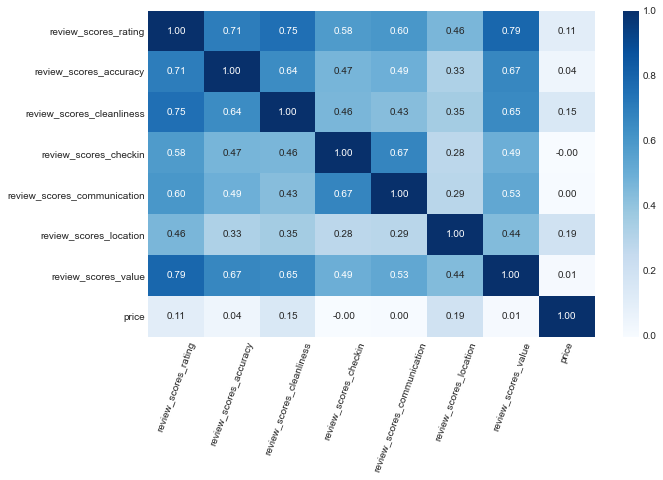

In [33]:
# check correlation between reviews to understand which one to use
plt.figure(figsize=(10, 6))

review_cols = list(listings_3.filter(regex='review_scores').columns)
review_cols.append("price")
sns.heatmap(listings_3[review_cols].corr(), annot=True, fmt=".2f", cmap="Blues");
plt.yticks(rotation=0);
plt.xticks(rotation=70);

# Price seems to be related the most with location rating, we will ignore this as we already have a neighborhood dummy
# we will consider review_scores_rating, review_score_cleanliness. Others dont seem to be related to price
# rating and cleanliness are very high collinearity, so may have to use only one

In [34]:
# Based on business understanding and trial and error -  to keep the model simple
drop_cols = ["calculated_host_listings_count", "review_scores_value", "review_scores_location", "review_scores_communication",
             "review_scores_checkin", "review_scores_accuracy", "availability_30", "availability_60", "availability_90",
             "availability_365", "calendar_updated", "amenities", "bathrooms", "host_total_listings_count", 'name', 'summary',
             'space', 'description', 'neighborhood_overview', 'notes', 'transit', 'access', 'interaction', 'house_rules', 
             'host_name', 'host_location', 'host_about', 'host_neighbourhood', 'host_verifications', 'street', 'neighbourhood',
             'city', 'zipcode', 'market', 'smart_location', 'is_location_exact', "cleaning_fee", "security_deposit",
             "longitude", "latitude", "beds", "guests_included", "id", "host_id", "minimum_nights", "maximum_nights",
             "reviews_per_month", "review_scores_rating", "extra_people", "host_response_rate"]

drop_cols.append("price")
len(drop_cols)

51

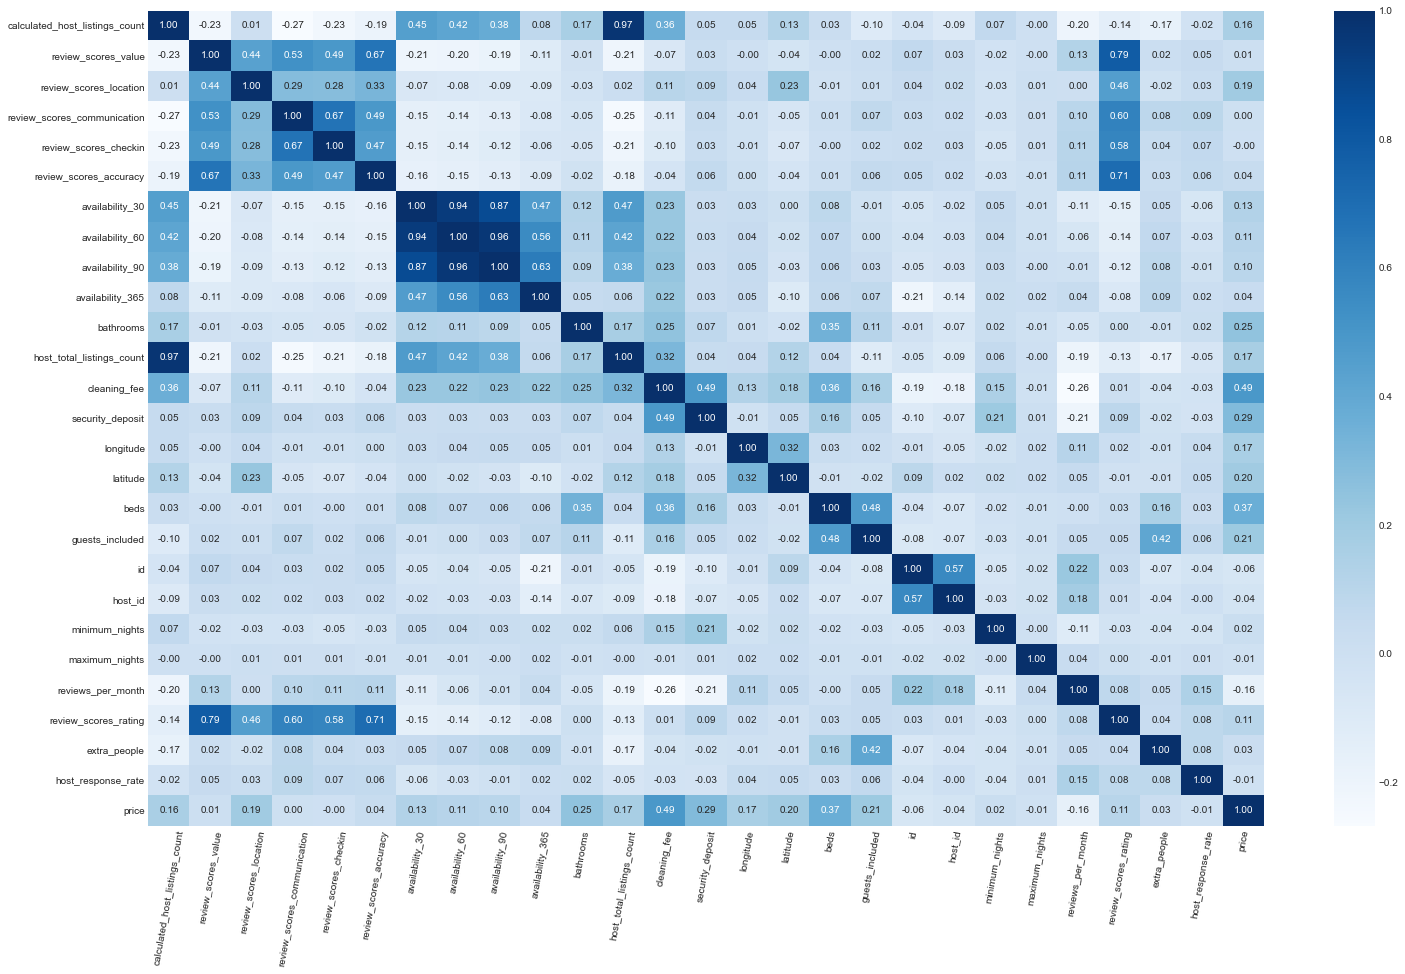

In [35]:
# Checking correltion with price for the colums in drop_col
plt.figure(figsize=(25, 15))

sns.heatmap(listings_3[drop_cols].corr(), annot=True, fmt=".2f", cmap="Blues");
plt.yticks(rotation=0);
plt.xticks(rotation=80);

# Price doesn't seem to be highly correlated with any of the numerical columns being dropped
# Cases where there is some cor-relation are the ones where another highly covariate is being included

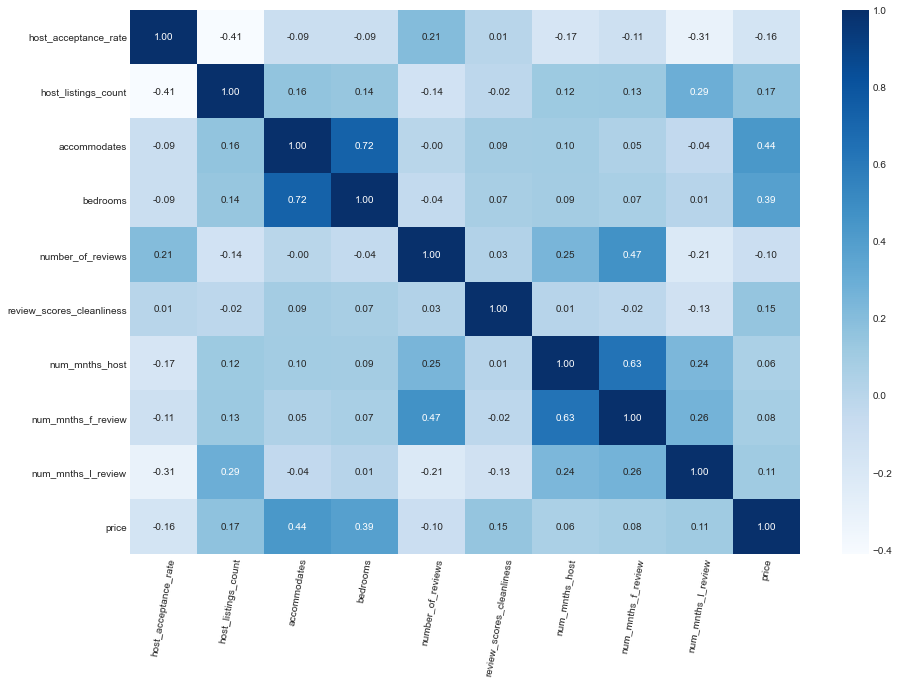

In [36]:
non_drop_cols = [col for col in listings_3.columns if col not in drop_cols]
non_drop_cols.append("price")

plt.figure(figsize=(15, 10))

sns.heatmap(listings_3[non_drop_cols].corr(), annot=True, fmt=".2f", cmap="Blues");
plt.yticks(rotation=0);
plt.xticks(rotation=80);

7. Drop the columns from drop_cols list and add in the amenities data

In [37]:
# merge the amenities with the original data : listings_3
listings_4 = pd.concat([listings_3[non_drop_cols], amenities_clean.iloc[:, 4:]] , axis=1)

In [38]:
listings_4.head()

,host_response_time,host_acceptance_rate,host_is_superhost,host_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,property_type,room_type,accommodates,...,Elevator in Building,Doorman,Pets Allowed,Pool,Suitable for Events,Kitchen,Cable TV,TV,Internet,Air Conditioning
0,NaN,NaN,f,1,t,f,Roslindale,House,Entire home/apt,4,...,0,0,0,0,0,1,0,1,1,0
1,within an hour,100.0,f,1,t,t,Roslindale,Apartment,Private room,2,...,0,0,1,0,0,1,0,1,1,1
2,within a few hours,88.0,t,1,t,t,Roslindale,Apartment,Private room,2,...,0,0,0,0,0,1,1,1,1,1
3,within a few hours,50.0,f,1,t,f,Roslindale,House,Private room,4,...,0,0,0,0,0,1,0,1,1,1
4,within an hour,100.0,t,1,t,t,Roslindale,House,Private room,2,...,0,0,0,0,0,1,0,0,1,1


8. Prepare the data for the model

In [39]:
#Create a copy of the main table to work with
listings_4_model = listings_4.copy()

listings_4_model.drop("num_facilities", axis=1, inplace=True)

dependent_variable = "price"

def clean__model_data(df, dep_var):
    """
    Function to take in a clean DataFrame and output the X and y Dataframe
    
    Inputs:
    df - Clean DataFrame
    dep_var - Dependent Variable
    
    Outputs:
    X, y - X and y DataFrames
    """

    # Reviews is creating issues, can potentially create a yes/no dummy on whether review 
    # scores are available but drop the columns for now

    df.dropna(subset=[dep_var], axis=0, inplace=True)
    df.dropna(subset=["review_scores_cleanliness"], axis=0, inplace=True)


    #Replace the NaN's with the median of the column. 
    #Mean will sensitive to extreme values
    num_vars = df.select_dtypes(include=['float', 'int']).copy().columns
    print("Numerical variables: ", num_vars)
    
    for var in num_vars:
        df[var].fillna(df[var].median(), inplace=True)

    # Create dummies for categorical variable and drop the original columns
    # Create a function similar to the one used in the course

    cat_vars = df.select_dtypes(include=['object']).copy().columns
    print("\nCategorical variables: ", cat_vars)

    for var in  cat_vars:
        # for each cat add dummy var, drop original column
        
        base_cat = listings_4_model[var].sort_values().iloc[0]
        print("\nCat Var {}: Base dummy category {}".format(var,base_cat))
        
        df = pd.concat([df.drop(var, axis=1), pd.get_dummies(df[var], prefix=var, prefix_sep='_', drop_first=True)], axis=1)
        

    #Check if any colun is still NaN    
    print("\n", df.columns[df.isnull().mean() > 0], "\n")
    
    X = df.drop(dep_var, axis=1).copy()
    y = df[dep_var].copy()
    
    return X,y


X, y = clean__model_data (listings_4_model, dependent_variable)

print("X shape", X.shape, "\n")
print("y shape", y.shape, "\n" )

Numerical variables:  Index(['host_acceptance_rate', 'host_listings_count', 'accommodates',
       'bedrooms', 'number_of_reviews', 'review_scores_cleanliness',
       'num_mnths_host', 'num_mnths_f_review', 'num_mnths_l_review', 'price',
       'Dryer', '24-Hour Check-in', 'Buzzer/Wireless Intercom', 'Heating',
       'Free Parking on Premises', 'Safety Card', 'First Aid Kit',
       'Smoke Detector', 'Essentials', 'Smoking Allowed',
       'Wheelchair Accessible', 'Free Parking on Street', 'Fire Extinguisher',
       'Hangers', 'Hair Dryer', 'Hot Tub', 'Iron', 'Gym', 'Washer',
       'Indoor Fireplace', 'Laptop Friendly Workspace', 'Breakfast',
       'Elevator in Building', 'Doorman', 'Pets Allowed', 'Pool',
       'Suitable for Events', 'Kitchen', 'Cable TV', 'TV', 'Internet',
       'Air Conditioning'],
      dtype='object')

Categorical variables:  Index(['host_response_time', 'host_is_superhost', 'host_has_profile_pic',
       'host_identity_verified', 'neighbourhood_cleansed', 

## Modelling and Evaluation

In [40]:
# use statsmodels OLS

X = sm.add_constant(X)

X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size = 0.3, random_state = 66)

#Instantiate the model
lm_model = sm.OLS(y_train, X_train)

#Fit
lm_model_2 = lm_model.fit()
print(lm_model_2.summary(), "\n")

#Predict
y_test_preds = lm_model_2.predict(X_test)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.660
Model:                            OLS   Adj. R-squared:                  0.643
Method:                 Least Squares   F-statistic:                     39.26
Date:                Wed, 07 Apr 2021   Prob (F-statistic):               0.00
Time:                        12:36:17   Log-Likelihood:                -10910.
No. Observations:                1936   AIC:                         2.200e+04
Df Residuals:                    1844   BIC:                         2.252e+04
Df Model:                          91                                         
Covariance Type:            nonrobust                                         
                                                     coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------

In [41]:
#score
test_rmse = (np.sqrt(mean_squared_error(y_test, y_test_preds)))
# test_score = r2_score(y_test, y_test_preds)

print("test_rmse =" ," ", test_rmse, "\n")
# print("r2 score =" ," ", test_score, "\n")

test_rmse =   63.342298046064876 



In [42]:
# Get the results in a df

coefs_df = pd.DataFrame(round(lm_model_2.params,2))
coefs_df.columns = ["coefficient"]
coefs_df["abs_params"] = round(np.abs(coefs_df.coefficient),2)
coefs_df["pvalue"] = round(lm_model_2.pvalues, 5)

coefs_df.sort_values(by = "abs_params", ascending=False, inplace=True)
coefs_df = coefs_df.loc[(coefs_df.pvalue < 0.05) & (coefs_df.abs_params > 10)].reset_index().rename(columns={"index": "variable"})

In [43]:
coefs_df["variable"] = coefs_df["variable"].str.replace('host_response_time_', "HRT ").str.replace('neighbourhood_cleansed_', "Nhood ").str.replace('property_type_', "P-type ").str.replace('room_type_', "R-type ")

a = coefs_df[coefs_df["variable"].str.contains("Nhood") == 1].index.values
b = coefs_df[coefs_df["variable"].str.contains("P-type") == 1].index.values
c = coefs_df[coefs_df["variable"].str.contains("R-type") == 1].index.values
d = coefs_df[coefs_df["variable"].str.contains(r"host_is_superhost|HRT|require_guest") == 1].index.values
e = coefs_df[coefs_df["variable"].str.contains("bedrooms") == 1].index.values
f = np.setdiff1d(coefs_df.index.values, np.concatenate([a,b,c,d,e], axis=0))

coefs_df.loc[a, "type"] = "Neighborhood"
coefs_df.loc[b, "type"] = "Property type"
coefs_df.loc[c, "type"] = "Room type"
coefs_df.loc[d, "type"] = "Host characterstics"
coefs_df.loc[e, "type"] = "Bedrooms"
coefs_df.loc[f, "type"] = "Amenities"
    
df1, df2 = coefs_df.loc[coefs_df.type == "Neighborhood"], coefs_df.loc[coefs_df.type != "Neighborhood"]

df1.reset_index(inplace=True)
df1.drop(["abs_params","index"], axis=1, inplace=True)
dfi.export(df1, 'df1.png')
df1

/Users/sugandhkumar/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,variable,coefficient,pvalue,type
0,Nhood Bay Village,117.38,0.00000,Neighborhood
1,Nhood South Boston Waterfront,93.62,0.00000,Neighborhood
2,Nhood Back Bay,84.30,0.00000,Neighborhood
3,Nhood Beacon Hill,77.60,0.00000,Neighborhood
4,Nhood Chinatown,76.45,0.00000,Neighborhood
5,Nhood Downtown,67.74,0.00000,Neighborhood
6,Nhood South End,59.39,0.00000,Neighborhood
7,Nhood Fenway,47.64,0.00000,Neighborhood
8,Nhood Hyde Park,-44.49,0.03397,Neighborhood
9,Nhood North End,38.82,0.00016,Neighborhood


In [44]:
df2.reset_index(inplace=True)
df2.drop(["abs_params", "index"], axis=1, inplace=True)
dfi.export(df2, 'df2.png')
df2

/Users/sugandhkumar/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,variable,coefficient,pvalue,type
0,P-type Other,70.59,0.00661,Property type
1,R-type Shared room,-63.39,0.00001,Room type
2,bedrooms,58.95,0.00000,Bedrooms
3,P-type Boat,58.11,0.01019,Property type
4,R-type Private room,-48.91,0.00000,Room type
5,require_guest_phone_verification_t,28.92,0.00645,Host characterstics
6,Indoor Fireplace,21.90,0.00004,Amenities
7,HRT within a few hours,18.71,0.00970,Host characterstics
8,P-type House,16.91,0.00135,Property type
9,host_is_superhost_t,15.26,0.00237,Host characterstics


In [45]:
# Using sklearn - pvalues are not automatically calculated

# X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size = 0.3, random_state = 66)

# #Instantiate the model
# lm_model = LinearRegression(normalize=True)

# #Fit
# lm_model.fit(X_train, y_train)

# #Predict
# y_test_preds = lm_model.predict(X_test)

# #score
# test_rmse = (np.sqrt(mean_squared_error(y_test, y_test_preds)))
# test_score = r2_score(y_test, y_test_preds)

# print("test_rmse =" ," ", test_rmse, "\n")
# print("r2 score =" ," ", test_score, "\n")

In [46]:
# coefs_df = pd.DataFrame()
# coefs_df['est_int'] = X_train.columns
# coefs_df['coefs'] = lm_model.coef_
# coefs_df['abs_coefs'] = np.abs(lm_model.coef_)
# coefs_df = coefs_df.sort_values('abs_coefs', ascending=False)
# coefs_df.head(60)